In [1]:
import pandas as pd

In [4]:
df2 = pd.read_csv('Cookoff_Test_Result.csv')

In [5]:
df2

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445
5,Hotdog,3,Charcoal,-1.9,364.000
6,Hotdog,5,Charcoal,-0.5,373.725
7,Hotdog,7,Charcoal,-2.4,366.710
8,Veggie Patty,1,Charcoal,-1.2,378.447
9,Veggie Patty,3,Charcoal,-1.3,382.218


In [6]:
df2.describe()

,device_id,user_satisfaction,fuel_cost
count,24.000000,24.000000,24.000000
mean,4.500000,0.133333,269.499208
std,2.340568,1.799919,114.449928
min,1.000000,-2.500000,140.875000
25%,2.750000,-1.300000,156.131250
50%,4.500000,-0.050000,269.600000
75%,6.250000,1.850000,374.905500
max,8.000000,2.800000,402.399000


In [14]:
pd.pivot_table(df2,index=['grill_type'],values=['fuel_cost'])

,fuel_cost
grill_type,
Charcoal,380.890083
Propane,158.108333


In [15]:
# pivot table 
pd.pivot_table(df2,index=['item_material','grill_type'],values=['user_satisfaction'])

user_satisfaction
item_material     grill_type                   
Ground Beef Patty Charcoal               -1.600
                  Propane                 2.150
Hotdog            Charcoal               -1.525
                  Propane                 1.550
Veggie Patty      Charcoal               -1.325
                  Propane                 1.550

In [13]:
pd.pivot_table(df2,index=['grill_type','device_id'],values=['user_satisfaction'])

user_satisfaction
grill_type device_id                   
Charcoal   1                  -1.133333
           3                  -1.500000
           5                  -1.833333
           7                  -1.466667
Propane    2                   1.800000
           4                   1.600000
           6                   1.600000
           8                   2.000000

In [16]:
pd.pivot_table(df2,index=['grill_type','device_id'], columns=['item_material'], values=['user_satisfaction'])

user_satisfaction                    
item_material        Ground Beef Patty Hotdog Veggie Patty
grill_type device_id                                      
Charcoal   1                      -0.9   -1.3         -1.2
           3                      -1.3   -1.9         -1.3
           5                      -2.5   -0.5         -2.5
           7                      -1.7   -2.4         -0.3
Propane    2                       1.6    1.8          2.0
           4                       2.4    1.2          1.2
           6                       2.6    2.0          0.2
           8                       2.0    1.2          2.8

### Taste Preferences EDA

In [75]:
df3=pd.read_csv('Taste_Test_Result.csv')

In [76]:
df3

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
1,1,Hotdog,False,Propane,0.4,True
2,2,Veggie Patty,True,Propane,0.9,True
3,3,Veggie Patty,False,Propane,0.8,True
4,4,Veggie Patty,True,Propane,0.8,True
...,...,...,...,...,...,...
715,3,Ground Beef Patty,False,Charcoal,0.5,True
716,4,Ground Beef Patty,True,Charcoal,0.4,True
717,5,Ground Beef Patty,False,Charcoal,0.2,True
718,6,Ground Beef Patty,True,Charcoal,0.1,True


In [77]:
df3.describe()

,sample_item_index,thumbs_up_score
count,720.000000,720.000000
mean,15.500000,2.034722
std,8.661458,2.398427
min,1.000000,0.000000
25%,8.000000,0.200000
50%,15.500000,0.550000
75%,23.000000,5.100000
max,30.000000,6.300000


In [78]:
df3['guess_grill_correct'].value_counts()

True     643
False     77
Name: guess_grill_correct, dtype: int64

In [79]:
sum(df3['guess_grill_correct'])/len(df3['guess_grill_correct'])

0.8930555555555556

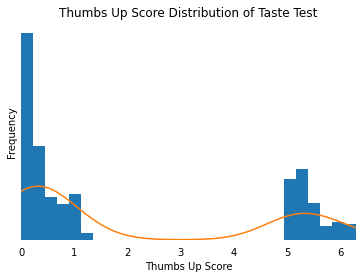

In [82]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,4))
thumbs_up_score = df3['thumbs_up_score']
thumbs_up_score.plot(kind='hist',density=True,bins=28)
thumbs_up_score.plot(kind='kde')
ax.set_xlim(0,6.3)
ax.set_yticks([])
ax.set_xlabel('Thumbs Up Score')
ax.set_ylabel('Frequency')
ax.set_title('Thumbs Up Score Distribution of Taste Test')
ax.tick_params(left=False, bottom=False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()